See the README.md file in the project folder for more details about this project, including the business case and primary question for the analysis. Criteria selection for the GBD Results Tool is also located in the README.

In [3]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
# Import the dataset and view the info and head of the data
gbd = pd.read_csv('/run/media/bruce/WD/GitHub/Datasets/IHME GBD 2021/Respiratory Causes of Death - EU-27 - 2012-2021/IHME-GBD_2021_DATA-b411c487-1.csv')
print("===== Dataset Info =====" '\n')
gbd.info()
print('\n' "===== First five rows =====")
gbd.head()

===== Dataset Info =====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330480 entries, 0 to 330479
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     330480 non-null  int64  
 1   measure_name   330480 non-null  object 
 2   location_id    330480 non-null  int64  
 3   location_name  330480 non-null  object 
 4   sex_id         330480 non-null  int64  
 5   sex_name       330480 non-null  object 
 6   age_id         330480 non-null  int64  
 7   age_name       330480 non-null  object 
 8   cause_id       330480 non-null  int64  
 9   cause_name     330480 non-null  object 
 10  metric_id      330480 non-null  int64  
 11  metric_name    330480 non-null  object 
 12  year           330480 non-null  int64  
 13  val            330480 non-null  float64
 14  upper          330480 non-null  float64
 15  lower          330480 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage:

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,1,Number,2013,10589.331043,11468.867301,9438.654286
1,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,1,Number,2013,9320.401070,10434.169420,7542.508086
2,1,Deaths,81,Germany,3,Both,22,All ages,322,Lower respiratory infections,1,Number,2013,19909.732113,21708.585516,17103.527461
3,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.024968,0.027020,0.022325
4,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.020368,0.022754,0.016486


In [ ]:
# Descriptive stats for the dataset
print("===== Descriptive statistics for the dataset =====")
gbd.describe()

===== Descriptive statistics for the dataset =====


,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,330480.000000,330480.000000,330480.000000,330480.00000,330480.000000,330480.000000,330480.000000,3.304800e+05,3.304800e+05,3.304800e+05
mean,4.029412,70.851852,2.000000,173.00000,665.823529,2.000000,2016.500000,2.107100e+05,2.442471e+05,1.817524e+05
std,2.134941,16.358744,0.816498,97.94401,291.141347,0.816498,2.872286,2.698877e+06,3.067813e+06,2.377335e+06
min,1.000000,45.000000,1.000000,22.00000,297.000000,1.000000,2012.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,54.000000,1.000000,124.00000,328.000000,1.000000,2014.000000,1.390339e-03,1.836781e-03,9.357030e-04
50%,5.000000,77.000000,2.000000,193.00000,515.000000,2.000000,2016.500000,4.286751e-01,5.427561e-01,3.230553e-01
75%,6.000000,86.000000,3.000000,242.00000,947.000000,3.000000,2019.000000,3.487790e+02,4.093847e+02,2.940222e+02
max,6.000000,93.000000,3.000000,284.00000,1048.000000,3.000000,2021.000000,1.585205e+08,1.755399e+08,1.434200e+08


In [21]:
# Count NAs in dataset
print("===== Number of NA values per variable =====")
gbd.isna().sum()

===== Number of NA values per variable =====


measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

Data appears mostly clean with no obvious missing data. Variable IDs (e.g., measure_id, location_id, etc.) were included by mistake during download (GBD results tool gives you the option to only include IDs, names, or both). Will remove since columns already exist with correct labels for each of these IDs. Will also change 'object' data types to 'category'. Consider dropping "_name" from column labels?

In [8]:
# Remove ID columns
drop_columns = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id']

gbd = gbd.drop(
    labels = drop_columns,
    axis = 1
)

gbd

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Deaths,Germany,Male,All ages,Lower respiratory infections,Number,2013,10589.331043,11468.867301,9438.654286
1,Deaths,Germany,Female,All ages,Lower respiratory infections,Number,2013,9320.401070,10434.169420,7542.508086
2,Deaths,Germany,Both,All ages,Lower respiratory infections,Number,2013,19909.732113,21708.585516,17103.527461
3,Deaths,Germany,Male,All ages,Lower respiratory infections,Percent,2013,0.024968,0.027020,0.022325
4,Deaths,Germany,Female,All ages,Lower respiratory infections,Percent,2013,0.020368,0.022754,0.016486
...,...,...,...,...,...,...,...,...,...,...
330475,Incidence,Spain,Female,20-54 years,Asthma,Percent,2021,0.000490,0.000671,0.000353
330476,Incidence,Spain,Both,20-54 years,Asthma,Percent,2021,0.000433,0.000586,0.000311
330477,Incidence,Spain,Male,20-54 years,Asthma,Rate,2021,123.584280,163.491555,86.549419
330478,Incidence,Spain,Female,20-54 years,Asthma,Rate,2021,213.068617,286.626852,155.875266


In [25]:
# Remove _name from column labels
col_names = {'measure_name': 'measure',
             'location_name': 'location',
             'sex_name': 'sex',
             'age_name': 'age',
             'cause_name': 'cause',
             'metric_name': 'metric'}

gbd.rename(columns=col_names,
           inplace=True)

gbd

,measure_id,measure,location_id,location,sex_id,sex,age_id,age,cause_id,cause,metric_id,metric,year,val,upper,lower
0,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,1,Number,2013,10589.331043,11468.867301,9438.654286
1,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,1,Number,2013,9320.401070,10434.169420,7542.508086
2,1,Deaths,81,Germany,3,Both,22,All ages,322,Lower respiratory infections,1,Number,2013,19909.732113,21708.585516,17103.527461
3,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.024968,0.027020,0.022325
4,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.020368,0.022754,0.016486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330475,6,Incidence,92,Spain,2,Female,284,20-54 years,515,Asthma,2,Percent,2021,0.000490,0.000671,0.000353
330476,6,Incidence,92,Spain,3,Both,284,20-54 years,515,Asthma,2,Percent,2021,0.000433,0.000586,0.000311
330477,6,Incidence,92,Spain,1,Male,284,20-54 years,515,Asthma,3,Rate,2021,123.584280,163.491555,86.549419
330478,6,Incidence,92,Spain,2,Female,284,20-54 years,515,Asthma,3,Rate,2021,213.068617,286.626852,155.875266


In [26]:
# Change object data types to category
gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']] = gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']].astype('category')
gbd.dtypes

measure_id        int64
measure        category
location_id       int64
location       category
sex_id            int64
sex            category
age_id            int64
age            category
cause_id          int64
cause          category
metric_id         int64
metric         category
year              int64
val             float64
upper           float64
lower           float64
dtype: object

Data is clean and ready for visualization and exploratory data analysis.

In [27]:
# Count the values of the categorical columns
gbd[['measure', 'location', 'sex', 'age', 'cause', 'metric']].apply(pd.Series.value_counts)

,measure,location,sex,age,cause,metric
20-54 years,NaN,NaN,NaN,82620.0,NaN,NaN
55+ years,NaN,NaN,NaN,82620.0,NaN,NaN
<20 years,NaN,NaN,NaN,82620.0,NaN,NaN
All ages,NaN,NaN,NaN,82620.0,NaN,NaN
Asthma,NaN,NaN,NaN,NaN,29160.0,NaN
Austria,NaN,12240.0,NaN,NaN,NaN,NaN
Belgium,NaN,12240.0,NaN,NaN,NaN,NaN
Both,NaN,NaN,110160.0,NaN,NaN,NaN
Bulgaria,NaN,12240.0,NaN,NaN,NaN,NaN
COVID-19,NaN,NaN,NaN,NaN,29160.0,NaN


Measures (prevalence, incidence, deaths) do not contain same number of values. Also, 'Latent tuberculosis infection' only has 9720 values compared to 29160 for all other causes. Did reporting methods change (e.g., not reporting incidence, prevalence, rates, etc.)? Will do a more detailed and aggregated analysis to determine the root cause.

In [29]:
# Yearly distribution by country
country_year_counts = (
    gbd.groupby(['location', 'year'], observed=False)
    .size()
    .reset_index(name='entries_per_year')
    .pivot(index='location', columns='year', values='entries_per_year')
    .fillna(0)
)
print(country_year_counts)

year         2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
location                                                               
Austria      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Belgium      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Bulgaria     1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Croatia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Cyprus       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Czechia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Denmark      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Estonia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Finland      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
France       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Germany      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Greece       1224  1224  1224  1224  1224  1224  1224  1224  122

In [35]:
# Cause per country
country_cause_counts = (
    gbd.groupby(['location', 'cause'], observed=False)
    .size()
    .reset_index(name='entries_per_cause')
)

# Pivot for better visualization
cause_pivot = country_cause_counts.pivot(
    index='location',
    columns='cause',
    values='entries_per_cause'
).fillna(0)
print(cause_pivot)

cause        Asthma  COVID-19  Chronic obstructive pulmonary disease  \
location                                                               
Austria        1080      1080                                   1080   
Belgium        1080      1080                                   1080   
Bulgaria       1080      1080                                   1080   
Croatia        1080      1080                                   1080   
Cyprus         1080      1080                                   1080   
Czechia        1080      1080                                   1080   
Denmark        1080      1080                                   1080   
Estonia        1080      1080                                   1080   
Finland        1080      1080                                   1080   
France         1080      1080                                   1080   
Germany        1080      1080                                   1080   
Greece         1080      1080                                   

The number of 'Latent tuberculosis infection' per country is 360, so ALL countries are missing values. The difference between 'Latent tuberculosis infection' and other causes is 720. Are there missing measures or metrics for latent tuberculosis? This would make sense if reporting methods changed. Will verify by counting each measure by cause.

In [37]:
prev = gbd[gbd['measure'].str.contains('prev', case=False)].groupby('cause', observed = False).size()
inci = gbd[gbd['measure'].str.contains('inci', case=False)].groupby('cause', observed = False).size()
death = gbd[gbd['measure'].str.contains('death', case=False)].groupby('cause', observed = False).size()

# Combine into single DataFrame
measure_counts = pd.DataFrame({
    'prevalence': prev,
    'incidence': inci,
    'deaths': death
}).fillna(0).astype(int)

# Add totals
measure_counts['Total'] = measure_counts.sum(axis=1)
measure_counts.loc['Total'] = measure_counts.sum()

print("===== Manual count per cause: =====")
print(measure_counts)

===== Manual count per cause: =====
                                                    prevalence  incidence  \
cause                                                                       
Asthma                                                    9720       9720   
COVID-19                                                  9720       9720   
Chronic obstructive pulmonary disease                     9720       9720   
Drug-susceptible tuberculosis                             9720       9720   
Extensively drug-resistant tuberculosis                   9720       9720   
Latent tuberculosis infection                             9720          0   
Lower respiratory infections                              9720       9720   
Multidrug-resistant tuberculosis without extens...        9720       9720   
Respiratory infections and tuberculosis                   9720       9720   
Tracheal, bronchus, and lung cancer                       9720       9720   
Tuberculosis                            

Incidence and deaths are indeed missing for latent tuberculosis infection. The assumption is that reporting methods changed.

The number of deaths per cause per country is an important measure as it indicates "hot spots" for specific diseases and also identifies areas where changes in health policy (e.g., surveillance, testing, improving access to care, etc.) could impact outcomes. Will create a heatmap to visualize this.

In [41]:
# Heatmap to compare the number of deaths per cause per country

# Filter for death records
gbd_deaths = gbd[gbd['measure'] == 'Deaths']

# Create a pivot table: countries vs causes
pivot_table = pd.pivot_table(
    gbd_deaths,
    index='location',      # Rows: Countries
    columns='cause',       # Columns: Causes
    values='val',          # Will use the reported value instead of the standard deviation for simplicity
    aggfunc='sum',         # Sum death counts for each country-cause combination
    fill_value=0,          # Fill missing combinations with 0
    observed=False
)

# For large datasets - focus on top entries
# top_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index
# top_causes = pivot_table.sum().sort_values(ascending=False).head(15).index
# pivot_table = pivot_table.loc[top_countries, top_causes]

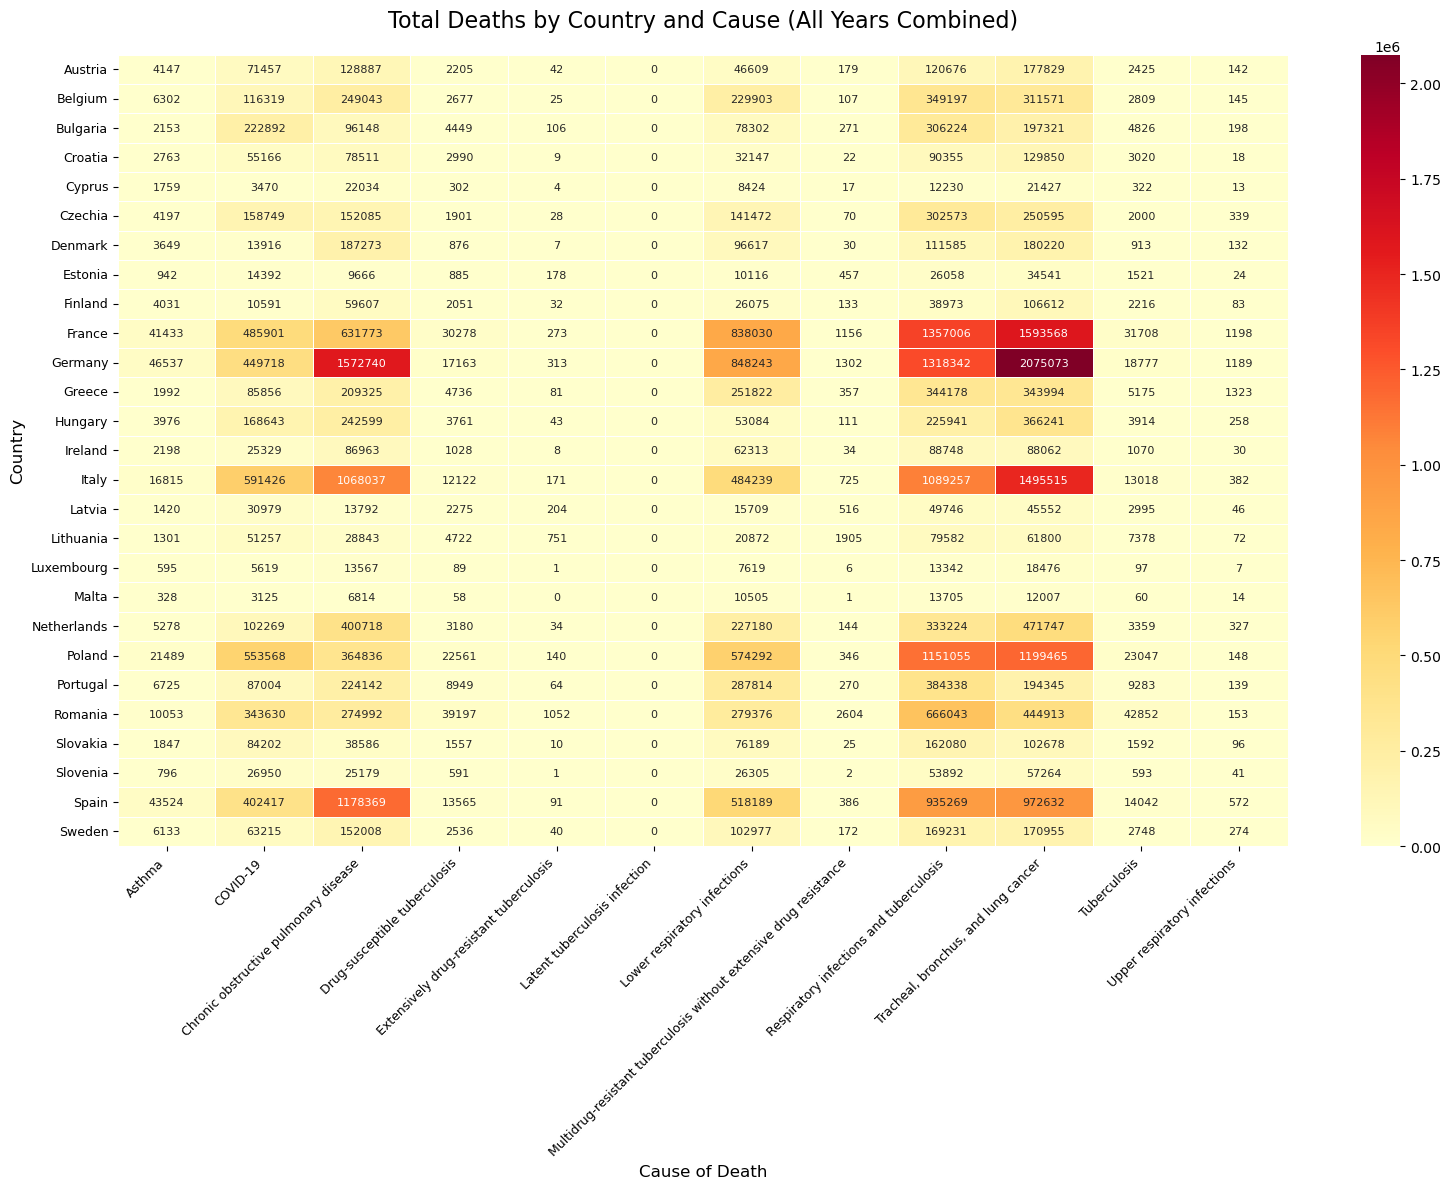

In [43]:
plt.figure(figsize=(16, 12))  # Adjust size based on data density

# Create heatmap with annotations
ax = sns.heatmap(
    pivot_table,
    annot=True,            # Show numbers in cells
    fmt=".0f",             # Format as integers
    cmap="YlOrRd",         # Yellow-Orange-Red color scale
    linewidths=.5,         # Add grid lines
    annot_kws={"size": 8}  # Annotation font size
)

# Customize labels
plt.title("Total Deaths by Country and Cause (All Years Combined)", fontsize=16, pad=20)
plt.xlabel("Cause of Death", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

France, Germany, and Spain have much higher asthma-related deaths compared to other countries. This could be explained by the larger total populations for each of these countries compared to the other EU-27 member states.

Germany, Spain, and Italy have a significant number of COPD-related deaths. Again, likely attributed to the larger total populations of these states. However, it would be interesting to compare the deaths with smoking prevalence. However, that's not available in this dataset.

There are an extremely high number of deaths attributed to tracheal, bronchus, and lung cancers across all states. Again, it would be interesting to compare the deaths with smoking prevalence in these countries.

Also of note is the number of COVID-related deaths compared to other measures. It's important to keep in mind that COVID-related deaths have only been tracked since 2020, so there are only 2 years of collected data for these deaths compared to collection across all years for all other causes of death.

This heatmap is a good overview of the actual number of deaths per country. However, it does not account for the total populations of the countries and may be deceiving. For instance, Portugal has ~384,000 deaths attributed to respiratory infections and tuberculosis and is not flagged as "high" in comparison to the ~1.35 million deaths in France for the same measure. This is deceiving as the total population of Portugal is ~10 million compared to a total population of ~66 million in France (looking at 2021 estimated population statistics).

Will do a log transformation of the data and create a log-transformed heatmap for comparison.

**Will continue visualizing the remaining measures across all countries and will trend each measure across years.**